In [1]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
df=df[df['job_title_short']=='Data Analyst']

In [3]:
df_exploded=df.explode('job_skills')


In [4]:
skill_stats=df_exploded.groupby('job_skills').agg(skill_count=('job_skills','count'),median_salary=('salary_year_avg','median'))#.sort_values('salary_year_avg',ascending=False).head(10)

In [5]:
skill_stats=skill_stats.sort_values('skill_count',ascending=False).head(10)

skill_stats.reset_index(inplace=True)


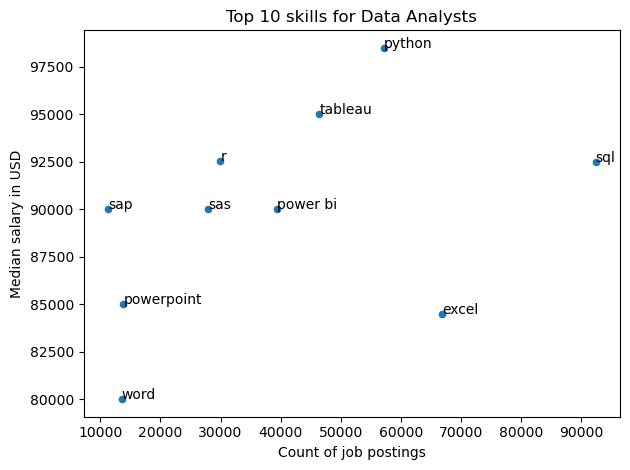

In [6]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median salary in USD')
plt.title('Top 10 skills for Data Analysts')
plt.tight_layout()
for i in skill_stats.index:
    plt.text(skill_stats['skill_count'][i],skill_stats['median_salary'][i],skill_stats['job_skills'][i])
plt.show()

In [7]:
skill_stats

,job_skills,skill_count,median_salary
0,sql,92428,92500.0
1,excel,66860,84479.0
2,python,57190,98500.0
3,tableau,46455,95000.0
4,power bi,39380,90000.0
5,r,29996,92527.5
6,sas,27998,90000.0
7,powerpoint,13822,85000.0
8,word,13562,80000.0
9,sap,11280,90000.0
